In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
# Load and convert loan csv to dataframe

loan_data = pd.read_csv('loan.csv', engine="python")

In [3]:
#Display first few rows
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Display last few rows
loan_data.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# check dimensions of dataframe , no. of rows and column
loan_data.shape

(39717, 111)

In [6]:
#from above analysis, did not find any header or footer in data

In [7]:
# Finding datatype in all coulmns
pd.set_option('display.max_columns', None)

# Printing data types of all columns
print(loan_data.dtypes)


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [8]:
# Calculate percentage of null or missing values in each column
null_percentage = round(100 * (loan_data.isnull().sum() / len(loan_data)), 2)

# Print columns with more than 0% missing values
columns_with_missing_values = null_percentage[null_percentage > 0]
print(columns_with_missing_values)


emp_title                       6.19
emp_length                      2.71
desc                           32.59
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64


In [9]:
#fetch total number of rows
num_total_rows=len(loan_data)
num_total_rows

39717

In [10]:
#check loan_status column as per domain knowledge note in lecture
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [11]:
#Rows with loan_status=='Current' needs to be dropped
loan_data= loan_data[loan_data['loan_status']!='Current']
print("Final Rows:",len(loan_data))

Final Rows: 38577


In [12]:
# Calculate percentage of rows deleted
percentage_rows_deleted = ((num_total_rows - len(loan_data)) * 100) / num_total_rows

# Print the percentage of rows deleted, rounded to two decimal places
print("Percentage of rows deleted: {:.2f}%".format(percentage_rows_deleted))


Percentage of rows deleted: 2.87%


In [13]:
# Count the number of duplicate rows
duplicate_rows_count = loan_data.duplicated().sum()

# Print the count of duplicate rows
print("Count of duplicate rows:", duplicate_rows_count)


Count of duplicate rows: 0


In [14]:
# Calculate the percentage of null values in each column
null_percentage = loan_data.isnull().sum() * 100 / len(loan_data)

# Display the percentage of null values in each column
print("Percentage of null values in each column:")
print(null_percentage)


Percentage of null values in each column:
id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [15]:
# Identify columns with all null or blank values
na_columns = loan_data.columns[loan_data.isna().all()].tolist()

# Count the total number of such columns
total_na_columns = len(na_columns)

# Print the count of columns with all null or blank values
print("Total columns with all null or blank values:", total_na_columns)

# Print the list of columns with all null or blank values
if total_na_columns > 0:
    print("Columns with all null or blank values:")
    print(na_columns)
else:
    print("No columns with all null or blank values.")


Total columns with all null or blank values: 55
Columns with all null or blank values:
['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq

In [16]:
# Keep track of the original number of columns
original_columns = loan_data.shape[1]

# Remove columns with all null values
loan_data = loan_data.dropna(axis=1, how="all")

# Calculate the number of columns removed
columns_removed = original_columns - loan_data.shape[1]

# Print the number of columns removed
print(f"{columns_removed} columns removed due to all null values.")

# Display the modified DataFrame
loan_data


55 columns removed due to all null values.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendin

In [17]:
# Keep track of the original number of rows
original_rows = loan_data.shape[0]

# Remove rows with all null values
loan_data = loan_data.dropna(axis=0, how="all")

# Calculate the number of rows removed
rows_removed = original_rows - loan_data.shape[0]

# Print the number of rows removed
print(f"{rows_removed} rows removed due to all null values.")

# Display the modified DataFrame
loan_data


0 rows removed due to all null values.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendin

In [18]:
# Identify columns with unique values
unique_columns = [clm for clm in loan_data.columns if loan_data[clm].nunique() == len(loan_data)]

# Print the list of columns with unique values
print("Columns with unique values across all rows:")
print(unique_columns)


Columns with unique values across all rows:
['id', 'member_id', 'url']


In [19]:
# Columns to drop for EDA (Exploratory Data Analysis)
columns_to_drop = ['url', 'member_id']

# Drop the specified columns
loan_data.drop(columns_to_drop, axis=1, inplace=True)


In [20]:
loan_data.shape

(38577, 54)

In [21]:
#Finding number of unique values, printing high unique valued columns
loan_data.nunique().sort_values(ascending=False).head(12)

id                 38577
total_pymnt        36714
total_pymnt_inv    36387
last_pymnt_amnt    34418
total_rec_int      34025
emp_title          28027
desc               25802
revol_bal          21275
title              19297
installment        15022
funded_amnt_inv     8050
total_rec_prncp     6841
dtype: int64

In [22]:
# Columns to drop for EDA (Exploratory Data Analysis)
columns_to_drop = ['emp_title', 'title', 'desc', 'sub_grade']

# Filter out columns that exist in the DataFrame
existing_columns = [col for col in columns_to_drop if col in loan_data.columns]

# Drop the existing columns
loan_data.drop(existing_columns, axis=1, inplace=True)


In [23]:
loan_data.shape

(38577, 50)

In [24]:
# List of columns containing behavioral data
behavioural_cols = [
    'delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'application_type', 'last_pymnt_d', 'last_credit_pull_d'
]

# Remove columns containing behavioral data
loan_data.drop(columns=behavioural_cols, inplace=True)


In [25]:
loan_data.nunique().sort_values(ascending=True)

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [26]:
# Columns with only one unique value
columns_to_drop = [
    'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq',
    'application_type', 'policy_code', 'collections_12_mths_ex_med',
    'initial_list_status', 'pymnt_plan'
]

# Filter out columns that exist in the DataFrame
existing_columns = [col for col in columns_to_drop if col in loan_data.columns]

# Drop the existing columns
loan_data.drop(columns=existing_columns, inplace=True)


In [27]:
loan_data.shape

(38577, 21)

In [28]:
# Calculate the percentage of null values in each column
null_percentage = round(100 * (loan_data.isnull().sum() / len(loan_data)), 2)

# Print columns with more than 0% missing values
columns_with_missing_values = null_percentage[null_percentage > 0]
print("Columns with missing values:")
print(columns_with_missing_values)




Columns with missing values:
emp_length                 2.68
mths_since_last_delinq    64.56
mths_since_last_record    92.90
pub_rec_bankruptcies       1.81
dtype: float64


In [29]:
# Remove columns with more than 50% null values
columns_to_drop = null_percentage[null_percentage > 50].index
loan_data.drop(columns=columns_to_drop, inplace=True)


In [30]:
loan_data.shape

(38577, 19)

In [31]:
#check unique value 
loan_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [32]:
# Remove leading and trailing whitespace from values in 'term' column
loan_data['term'] = loan_data['term'].str.strip()

# Display unique values in the 'term' column
unique_terms = loan_data['term'].unique()
print("Unique values in the 'term' column:")
print(unique_terms)

Unique values in the 'term' column:
['36 months' '60 months']


In [33]:
# List datatype in columns
loan_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [34]:
 # Count the frequency of each value in the 'term' column
term_counts = loan_data['term'].value_counts()

# Display the frequency of each value
print("Frequency of each value in the 'term' column:")
print(term_counts)


Frequency of each value in the 'term' column:
term
36 months    29096
60 months     9481
Name: count, dtype: int64


In [35]:
# Define a function to convert 'term' from string to int
def clean_term(term):
    return int(term.split()[0])

# Apply the cleaning function to the 'term' column
loan_data['term'] = loan_data['term'].apply(clean_term)

# Check the data type of the 'term' column after conversion
print("Data type of the 'term' column after conversion:", loan_data['term'].dtype)


Data type of the 'term' column after conversion: int64


In [36]:
loan_data['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [37]:
# Convert 'int_rate' column to string type
loan_data['int_rate'] = loan_data['int_rate'].astype(str)

# Remove '%' symbol from 'int_rate'
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype(float)


In [38]:
loan_data['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [39]:
# Convert 'issue_d' to datetime type and adjust dates
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2020 else x)


In [40]:
loan_data


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500,8500,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000,5000,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,208xx,MD,3.72,NaN


In [41]:
# Convert the columns 'loan_amnt' and 'funded_amnt' to float64
loan_data[['loan_amnt', 'funded_amnt']] = loan_data[['loan_amnt', 'funded_amnt']].astype(float)

# Display the DataFrame after conversion
loan_data


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,208xx,MD,3.72,NaN


In [42]:
# Define the columns to round off to two decimal points
columns_to_round = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']

# Round off the specified columns to two decimal points
loan_data[columns_to_round] = loan_data[columns_to_round].round(2)

# Display the rounded values for verification
for c in columns_to_round:
    print(loan_data[c])


0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [43]:
# calculate percentage of missing values in each column of the DataFrame
(loan_data.isnull().sum()*100)/len(loan_data)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [44]:
# Store the number of rows before dropping null rows
prev_rows = len(loan_data)

# Dropping null rows for 'emp_length' and 'pub_rec_bankruptcies' columns
loan_data.dropna(subset=['emp_length', 'pub_rec_bankruptcies'], inplace=True)

# Calculate the number of rows after dropping null rows
new_rows = len(loan_data)

# Display the number of rows before and after dropping null rows
print("Number of rows before dropping null rows:", prev_rows)
print("Number of rows after dropping null rows:", new_rows)


Number of rows before dropping null rows: 38577
Number of rows after dropping null rows: 36847


In [45]:
# calculate percentage of missing values in each column of the DataFrame
(loan_data.isnull().sum()*100)/len(loan_data)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [46]:
print(loan_data['emp_length'])

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 36847, dtype: object


In [47]:
def clean_emp_length(emp_length):
    # Remove "years" and "<" characters
    emp_length = emp_length.strip("years")
    emp_length = emp_length.strip("<")
    # Remove whitespace and "+" characters
    emp_length = emp_length.replace(" ", "").replace("+", "")
    return emp_length

# Apply the cleaning function to the 'emp_length' column
loan_data['emp_length'] = loan_data['emp_length'].apply(clean_emp_length)


In [48]:
print(loan_data['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


#Univariate Analysis

Loan

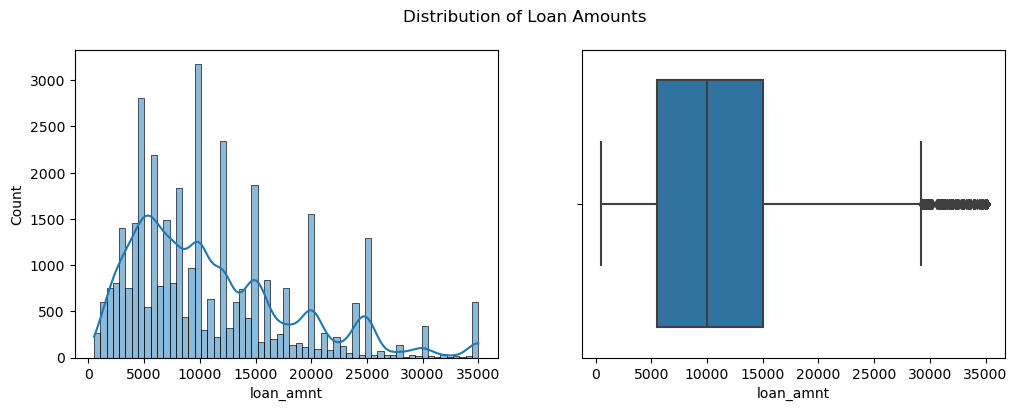

In [49]:
# Set the figure size
plt.figure(figsize=(12, 4))

# Plot the histogram
plt.subplot(1, 2, 1)
sns.histplot(data=loan_data, x='loan_amnt', kde=True)  # Removed rug=True

# Plot the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_data, x='loan_amnt')

# Set a single title for both subplots
plt.suptitle('Distribution of Loan Amounts')

# Show the plot
plt.show()

In [50]:
# Displaying descriptive statistics for the loan amount, including specific percentiles.
loan_data.loan_amnt.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Observation: The distribution of loan amounts indicates that a significant number of individuals opted for a loan amount of "10,000", with the median loan amount also being "10,000" Relatively few individuals chose loan amounts exceeding "30,000"

funded Amount plot

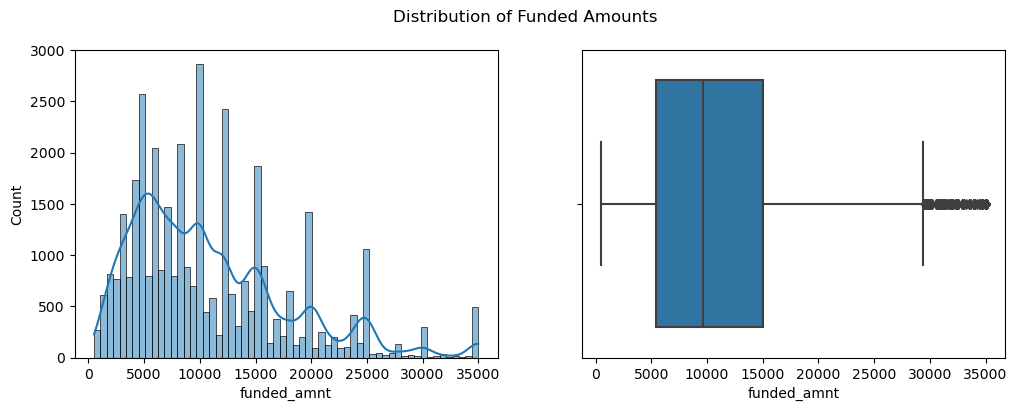

In [51]:
# Set the figure size
plt.figure(figsize=(12, 4))

# Plot the histogram using histplot
plt.subplot(1, 2, 1)
sns.histplot(data=loan_data, x='funded_amnt', kde=True)

# Plot the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_data, x='funded_amnt')

# Set a single title for both subplots
plt.suptitle('Distribution of Funded Amounts')

# Show the plot
plt.show()

In [52]:
loan_data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
90%      20325.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

Observation: The distribution of funded amounts behaves similarly to that of loan amounts. This suggests that Lending Club tends to approve most of the applied loan amounts.

Interest Rate

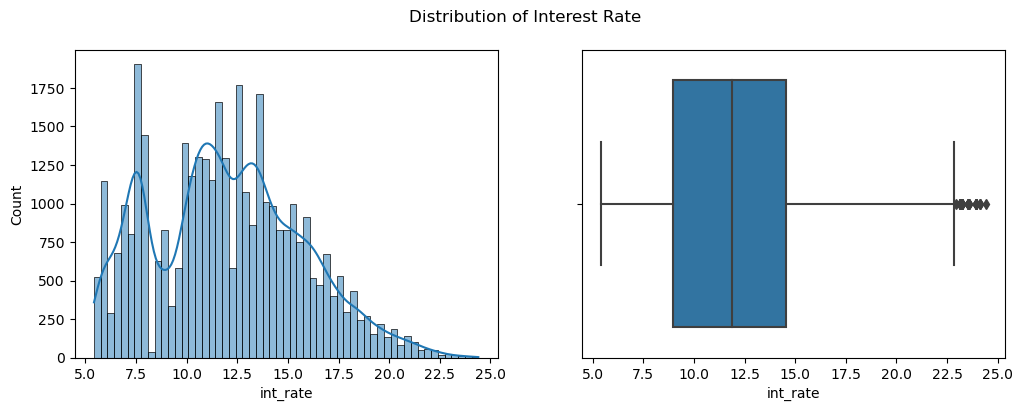

In [53]:
# Set the figure size
plt.figure(figsize=(12, 4))

# Plot the histogram using histplot
plt.subplot(1, 2, 1)
sns.histplot(data=loan_data, x='int_rate', kde=True)

# Plot the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_data, x='int_rate')

# Set a single title for both subplots
plt.suptitle('Distribution of Interest Rate')

# Show the plot
plt.show()

In [54]:
loan_data['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

Observation:
The majority of applicants have interest rates ranging from 8% to 14%, with an average interest rate of 11.7%. The distribution of interest rates indicates that most fall between 9% and 14.5%, while some individuals have opted for higher rates, reaching up to 22.5%.

Annual Income

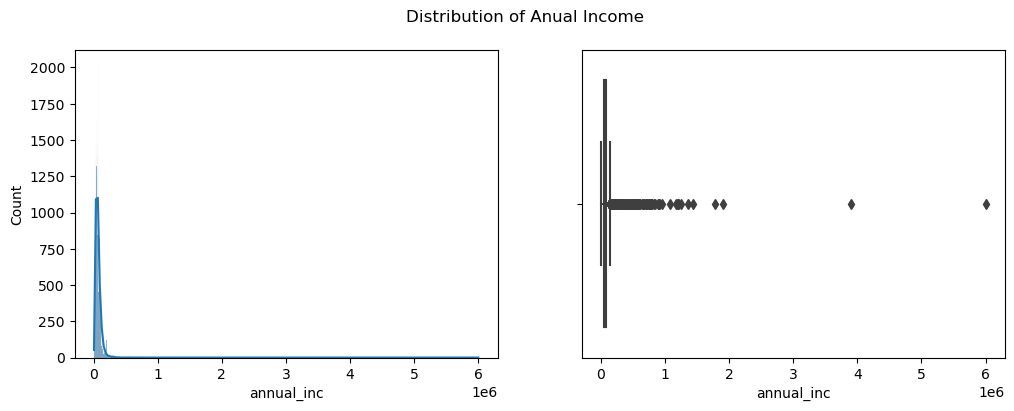

In [55]:
# Set the figure size
plt.figure(figsize=(12, 4))

# Plot the histogram using histplot
plt.subplot(1, 2, 1)
sns.histplot(data=loan_data, x='annual_inc', kde=True)

# Plot the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_data, x='annual_inc')

# Set a single title for both subplots
plt.suptitle('Distribution of Anual Income')

# Show the plot
plt.show()

Ownership of Home 

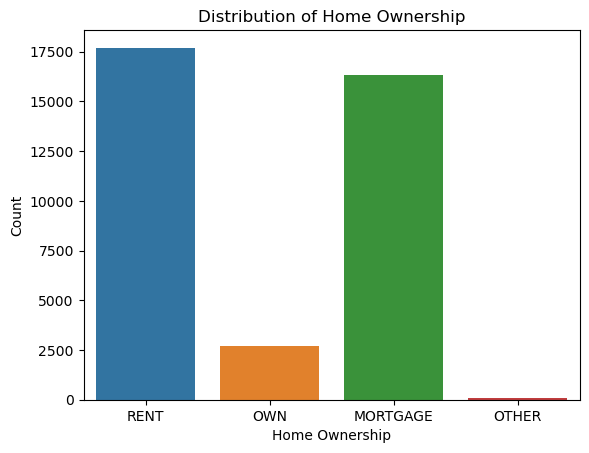

In [56]:
# Plot the distribution of home ownership
sns.countplot(x='home_ownership', data=loan_data)

# Set labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')

# Show the plot
plt.show()

Observation: Most of the home owners are living on Rent or on Mortgage

Length of Employment

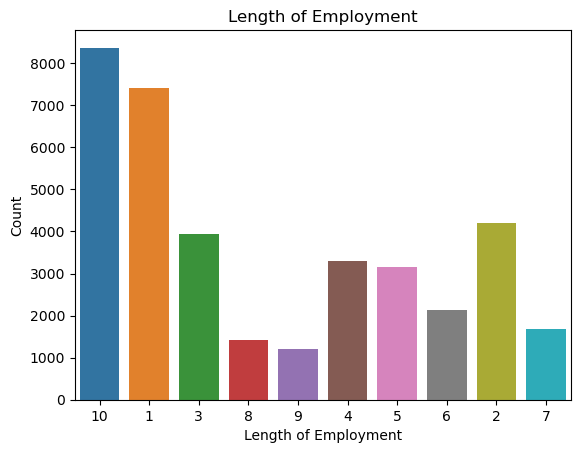

In [57]:
sns.countplot(x='emp_length', data=loan_data)

# Set labels and title
plt.xlabel('Length of Employment')
plt.ylabel('Count')
plt.title('Length of Employment')

# Show the plot
plt.show()

observation: Emplyment length is 10+ for most of the borrowers

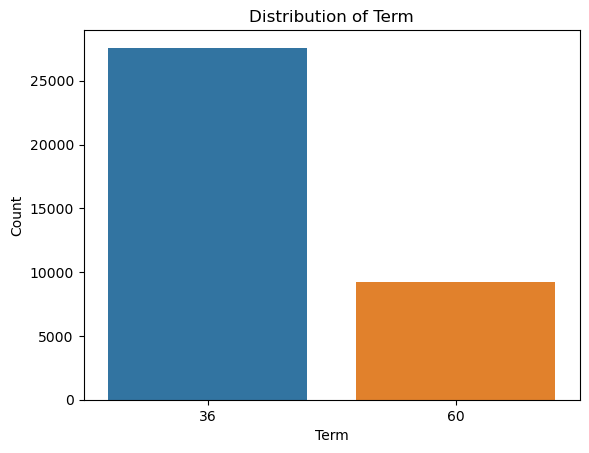

In [58]:
# Plot the distribution of term
sns.countplot(x='term', data=loan_data)

# Set labels and title
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term')

# Show the plot
plt.show()

Observation: term is more of 36 months

Verification status of Loan

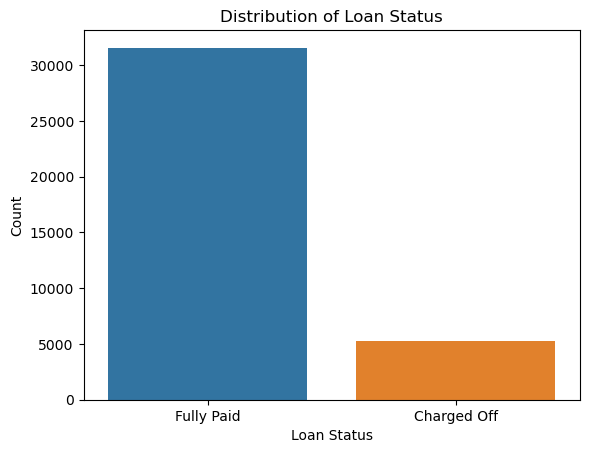

In [59]:
# Plot the distribution of loan status
sns.countplot(x='loan_status', data=loan_data)

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

# Show the plot
plt.show()

Observations:
The data reveals that 85% of borrowers have fully paid off their loans, while 14% have defaulted on their loans

verification status of Loans

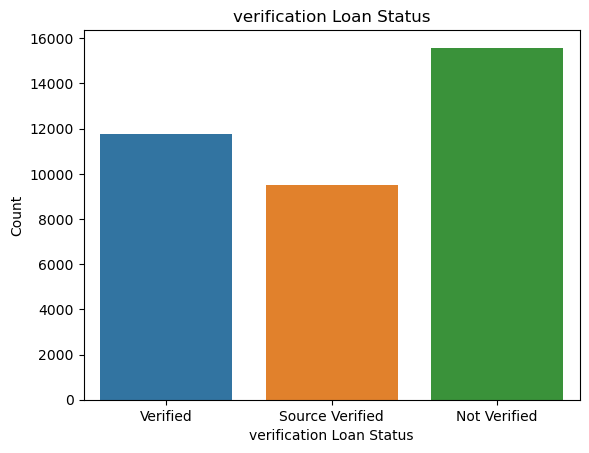

In [60]:
# Plot the distribution of loan status
sns.countplot(x='verification_status', data=loan_data)

# Set labels and title
plt.xlabel('verification Loan Status')
plt.ylabel('Count')
plt.title('verification Loan Status')

# Show the plot
plt.show()

Observations:
The majority of loans were disbursed without verifying the income of the applicants.

purpose of Loan:

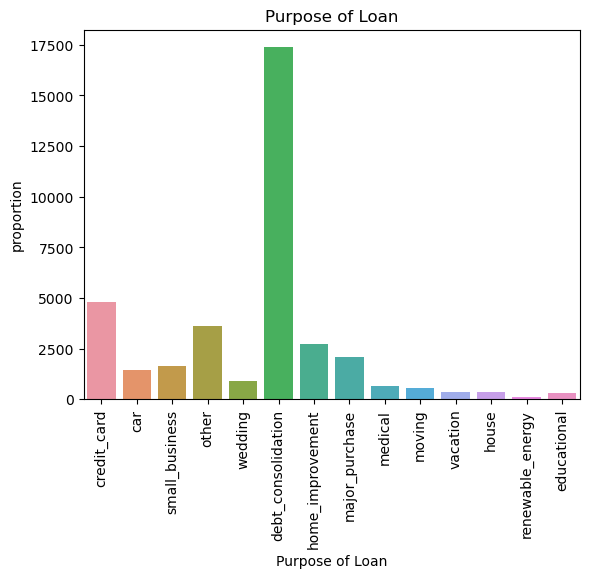

In [61]:
# Plot the distribution of loan status
sns.countplot(x='purpose', data=loan_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Set labels and title
plt.xlabel('Purpose of Loan')
plt.ylabel('proportion')
plt.title('Purpose of Loan')

# Show the plot
plt.show()


Obersvation: The majority of loan applicants are seeking debt consolidation.

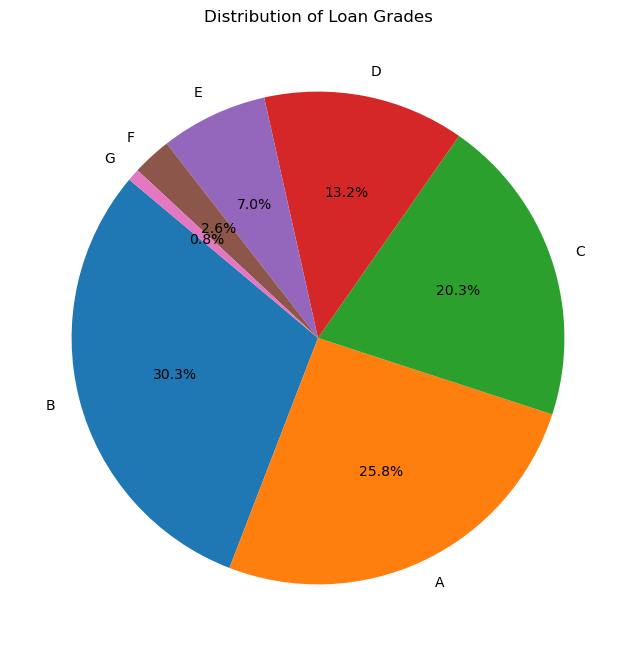

In [62]:
# Visualize the distribution of loan grades using a pie chart
loan_data['grade'].value_counts().plot(kind="pie", figsize=(8, 8), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Grades')
plt.ylabel('')
plt.show()


Observation: 
Max borrowers are from B grade followed by A

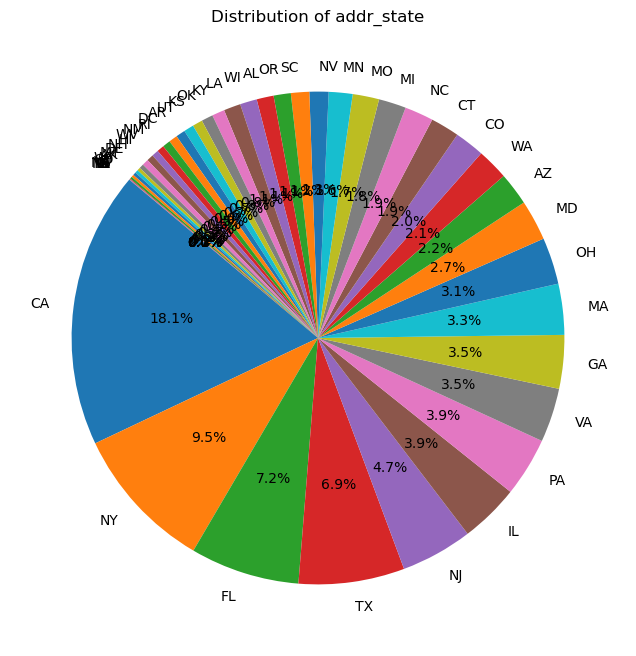

In [63]:
# Visualize the distribution of addresses
loan_data['addr_state'].value_counts().plot(kind="pie", figsize=(8, 8), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of addr_state')
plt.ylabel('')
plt.show()

Bivariate Analysis

Chargedoff_Proportion vs Intrest rate

In [64]:
# Column metadata
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [65]:
#create buckets
# Define a function to bucket loan amounts
def bucket_loan_amnt(amount):
    if amount <= 5000:
        return '0 - 5K'
    elif amount <= 10000:
        return '5K - 10K'
    elif amount <= 15000:
        return '10K - 15K'
    else:
        return '15K - above'

# Apply the function to create a new column 'loan_amnt_b'
loan_data['loan_amnt_b'] = loan_data['loan_amnt'].apply(bucket_loan_amnt)


In [66]:
# Define a function to bucket annual income
def bucket_annual_inc(income):
    if income <= 40000:
        return '0 - 40k'
    elif income <= 50000:
        return '40k - 50k'
    elif income <= 60000:
        return '50k to 60k'
    elif income <= 70000:
        return '60k to 70k'
    elif income <= 80000:
        return '70k to 80k'
    else:
        return '80k - above'

# Apply the function to create a new column 'annual_inc_b'
loan_data['annual_inc_b'] = loan_data['annual_inc'].apply(bucket_annual_inc)


In [67]:
# Define a function to bucket interest rates
def bucket_int_rate(rate):
    if rate <= 9:
        return 'Very Low'
    elif rate <= 11:
        return 'Low'
    elif rate <= 13:
        return 'Moderate'
    elif rate <= 15:
        return 'High'
    else:
        return 'Very High'

# Apply the function to create a new column 'int_rate_b'
loan_data['int_rate_b'] = loan_data['int_rate'].apply(bucket_int_rate)


In [68]:
#Bivariate Analysis on annual income against Chargedoff

inc_range_vs_loan = loan_data.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1577,7337,8914,0.176913
2,50k to 60k,836,4544,5380,0.155390
1,40k - 50k,815,4632,5447,0.149624
3,60k to 70k,529,3428,3957,0.133687
4,70k to 80k,444,2974,3418,0.129901
5,80k - above,1080,8651,9731,0.110986


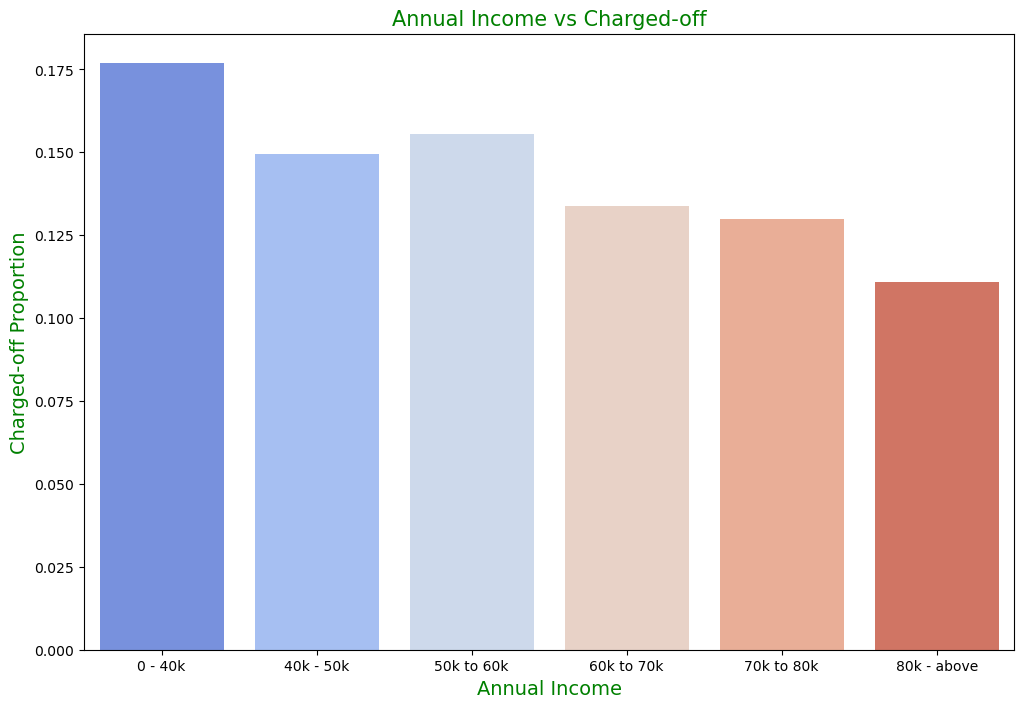

In [69]:
plt.figure(figsize=(12, 8))
plt.title('Annual Income vs Charged-off', fontsize=15, color='green')

ax = sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette='coolwarm')
ax.set_ylabel('Charged-off Proportion', fontsize=14, color='green')
ax.set_xlabel('Annual Income', fontsize=14, color='green')

plt.show()


In [70]:
#Bivariate Analysis on Intrest rate  against Chargedoff

interest_vs_loan = loan_data.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,2029,5780,7809,0.259828
0,High,1056,5329,6385,0.165388
2,Moderate,1048,6288,7336,0.142857
1,Low,615,5444,6059,0.101502
4,Very Low,533,8725,9258,0.057572


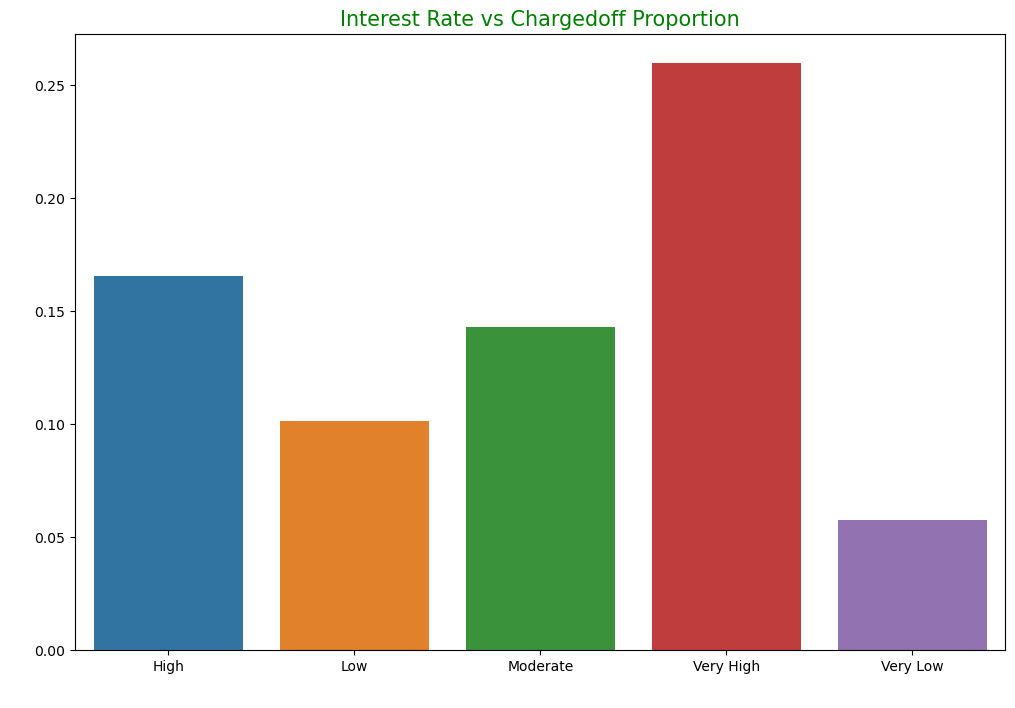

In [71]:
## plot the diagram.
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='green')
ax1=sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


Observations:

Loans with interest rates less than 10%, or very low, have very low chances of being charged off. Interest rates start from a minimum of 5%.
Loans with interest rates higher than 16%, or very high, have a higher likelihood of being charged off compared to other interest rate categories.
The proportion of charged-off loans tends to increase with higher interest rates.

In [72]:
#Bivariate Analysis of Home Ownership against Chargedoff

home_ownership_vs_loan = loan_data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,18,80,98,0.183673
3,RENT,2677,15021,17698,0.151260
2,OWN,387,2321,2708,0.142910
0,MORTGAGE,2199,14144,16343,0.134553


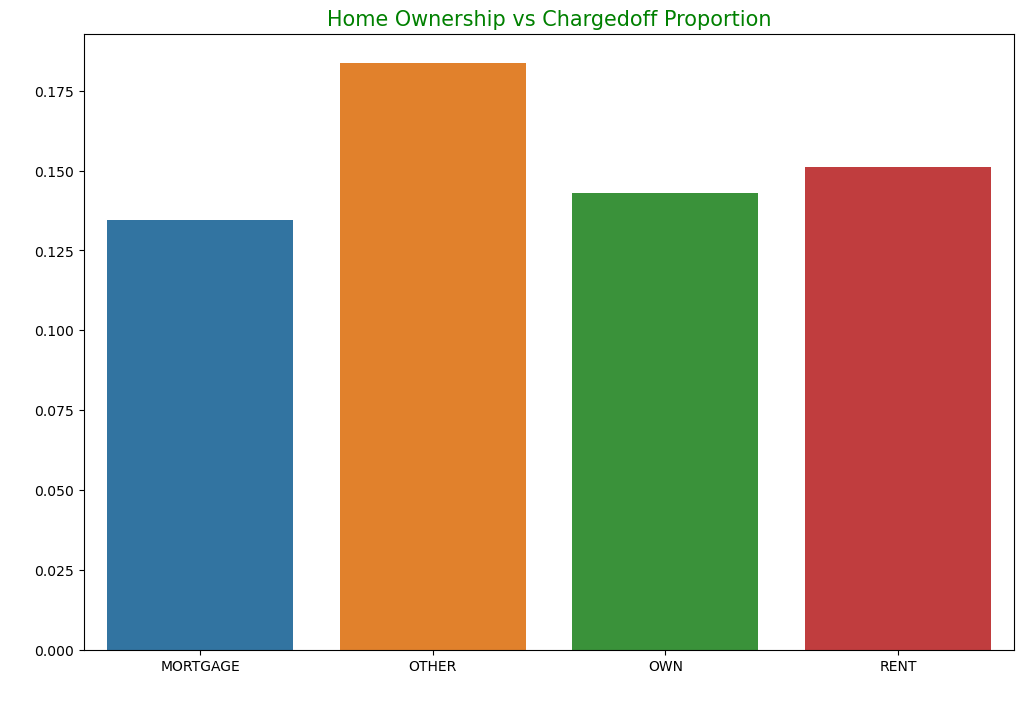

In [73]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='green')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observation:
Individuals who do not own a home are more likely to default on their loans.

In [74]:
#Bivariate Analysis on Purpose of loan against Chargedoff

purpose_vs_loan = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,444,1213,1657,0.267954
10,renewable_energy,18,76,94,0.191489
5,house,58,291,349,0.166189
3,educational,49,250,299,0.163880
9,other,582,3026,3608,0.161308
7,medical,100,547,647,0.154560
2,debt_consolidation,2628,14756,17384,0.151173
8,moving,81,462,543,0.149171
12,vacation,50,292,342,0.146199
4,home_improvement,321,2416,2737,0.117282


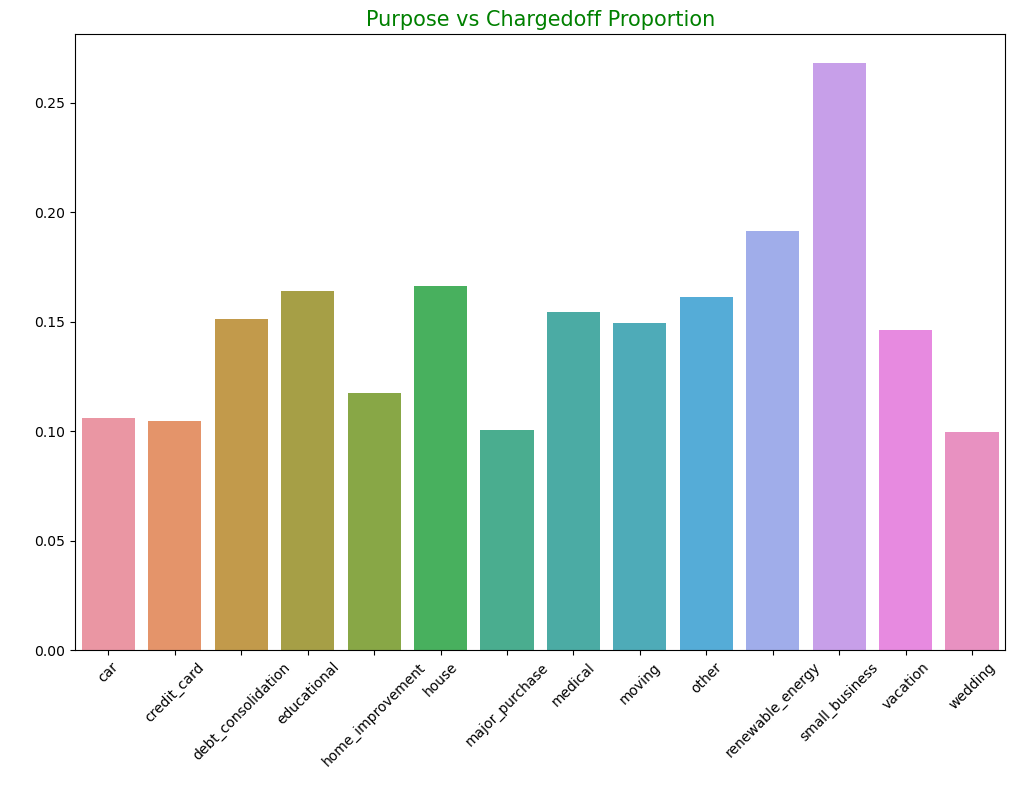

In [75]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='green')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

Applicants with home loans have lower chances of loan defaults.
Applicants with loans for small businesses have higher chances of loan defaults.

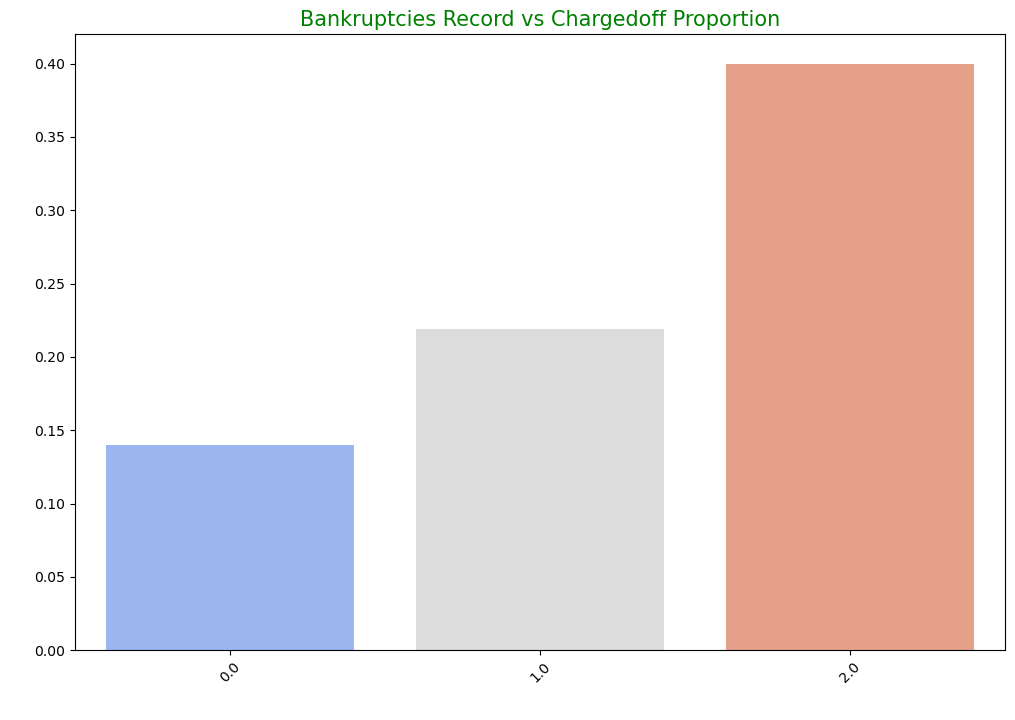

In [76]:
# Bivariate Analysis on Bankruptcies Record against Chargedoff
pub_rec_bankruptcies_vs_loan = loan_data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off'] + pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Graph
plt.figure(figsize=(12, 8))
plt.title('Bankruptcies Record vs Chargedoff Proportion', fontsize=15, color='green')

ax = sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan, palette='coolwarm')
ax.set_xlabel('Bankruptcies Record To Income Ratio', fontsize=14, color='white')
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='white')
plt.xticks(rotation=45)

plt.show()


Observations:

Applicants with 2 bankruptcies records show a high impact on loan defaults.
Applicants with 0 bankruptcies records exhibit a low impact on loan defaults.
Lower bankruptcies records indicate lower risk.

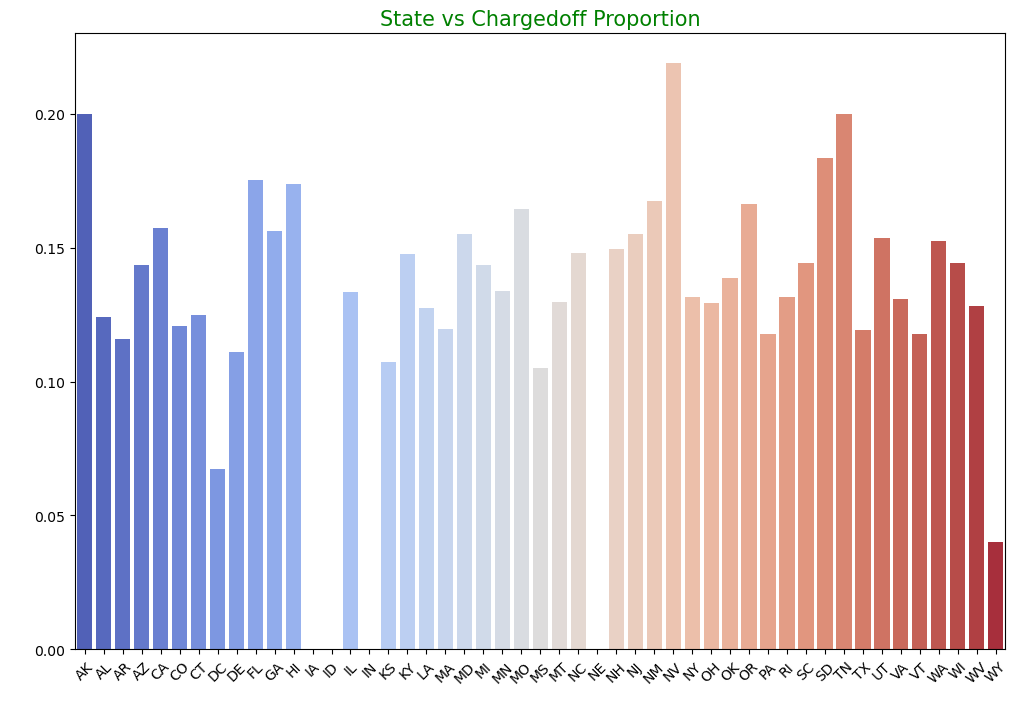

In [77]:
# Bivariate Analysis on Address State against Chargedoff
addr_state_vs_loan = loan_data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off'] + addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Graph
plt.figure(figsize=(12, 8))
plt.title('State vs Chargedoff Proportion', fontsize=15, color='green')

ax = sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan, palette='coolwarm')
ax.set_xlabel('State', fontsize=14, color='white')
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='white')
plt.xticks(rotation=45)

plt.show()


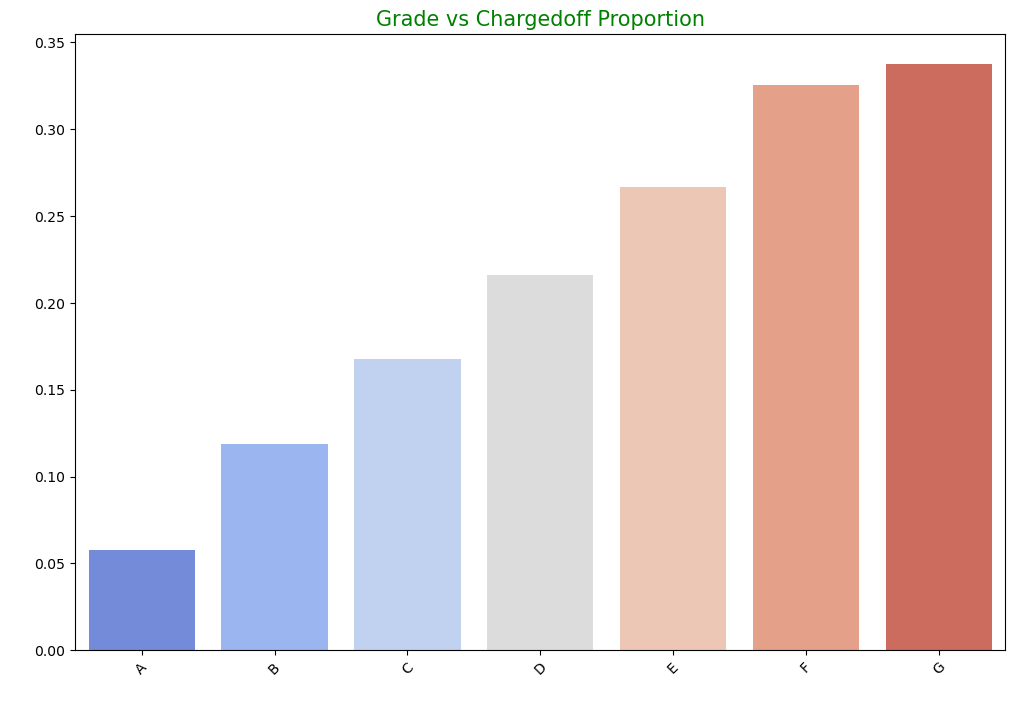

In [78]:
# Bivariate Analysis on Grade against Chargedoff
grade_vs_loan = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Graph
plt.figure(figsize=(12, 8))
plt.title('Grade vs Chargedoff Proportion', fontsize=15, color='green')

ax = sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan, palette='coolwarm')
ax.set_xlabel('Grade', fontsize=14, color='white')
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='white')
plt.xticks(rotation=45)

plt.show()


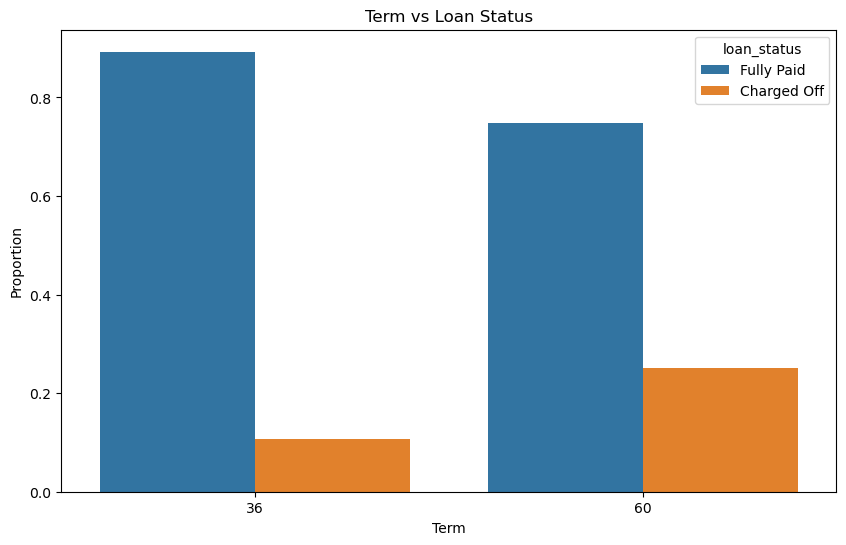

In [79]:
# Calculate proportion of values for each category
term_loan_status_counts = loan_data.groupby(['term', 'loan_status']).size().reset_index(name='count')
term_loan_status_counts['proportion'] = term_loan_status_counts.groupby('term')['count'].transform(lambda x: x / x.sum())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='proportion', hue='loan_status', hue_order=['Fully Paid', 'Charged Off'], data=term_loan_status_counts)
plt.title('Term vs Loan Status')
plt.xlabel('Term')
plt.ylabel('Proportion')
plt.show()


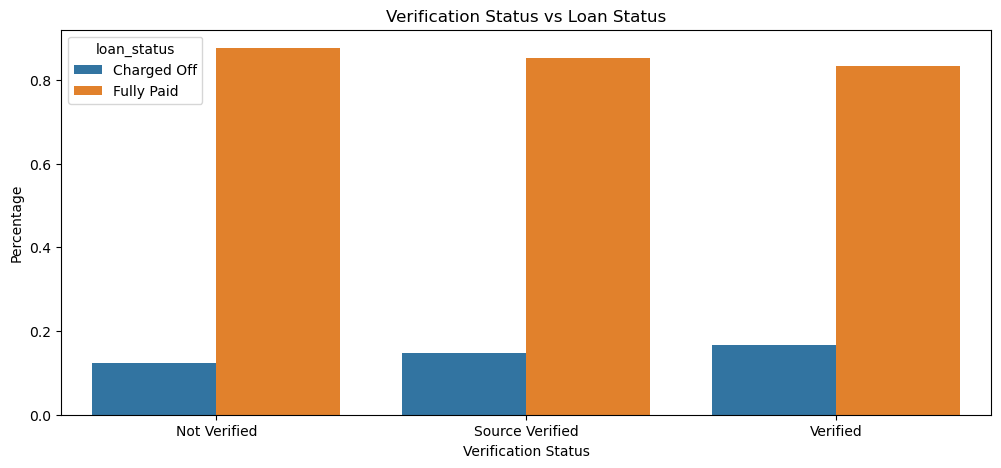

In [80]:
# Grouping by verification_status and loan_status, counting occurrences
verification_loan_counts = loan_data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()

# Calculating the percentage within each verification_status group
verification_loan_counts['percentage'] = verification_loan_counts.groupby('verification_status')['id'].transform(lambda x: x / x.sum())

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=verification_loan_counts)
plt.title('Verification Status vs Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.show()


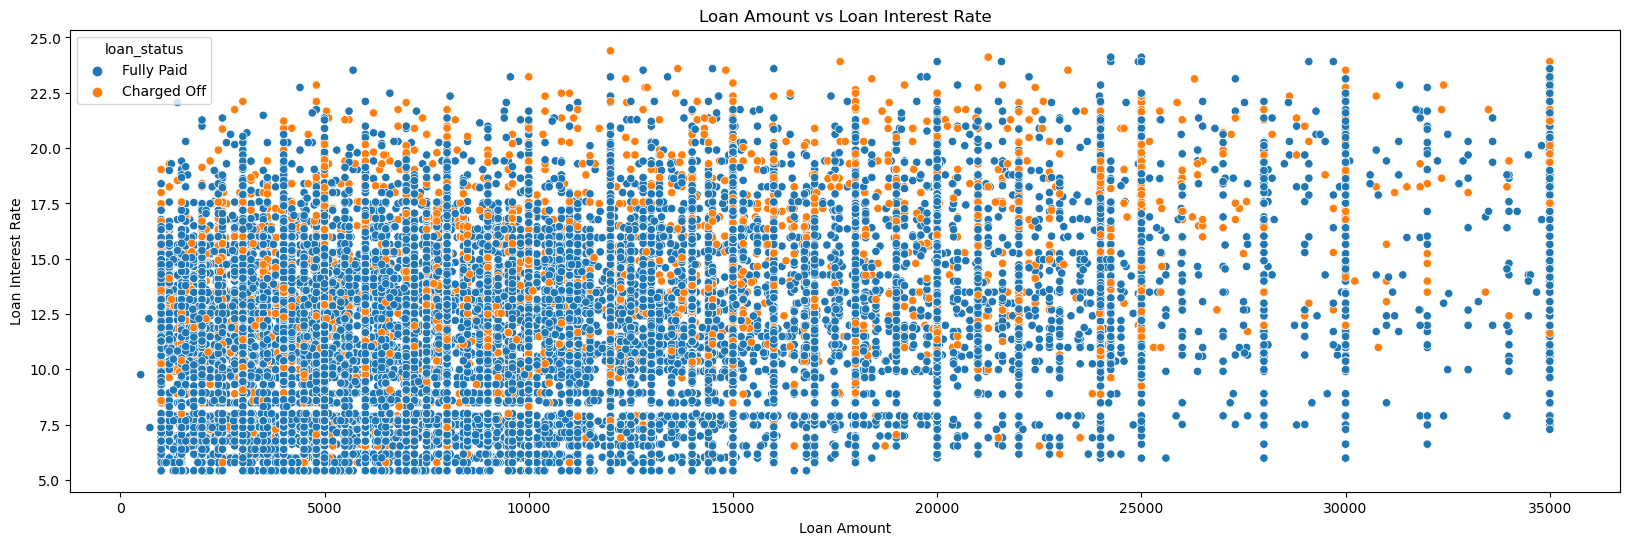

In [81]:
# Plotting loan amount vs loan interest rate with scatterplot
plt.figure(figsize=(20, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data, hue='loan_status')
plt.title('Loan Amount vs Loan Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Interest Rate')
plt.show()


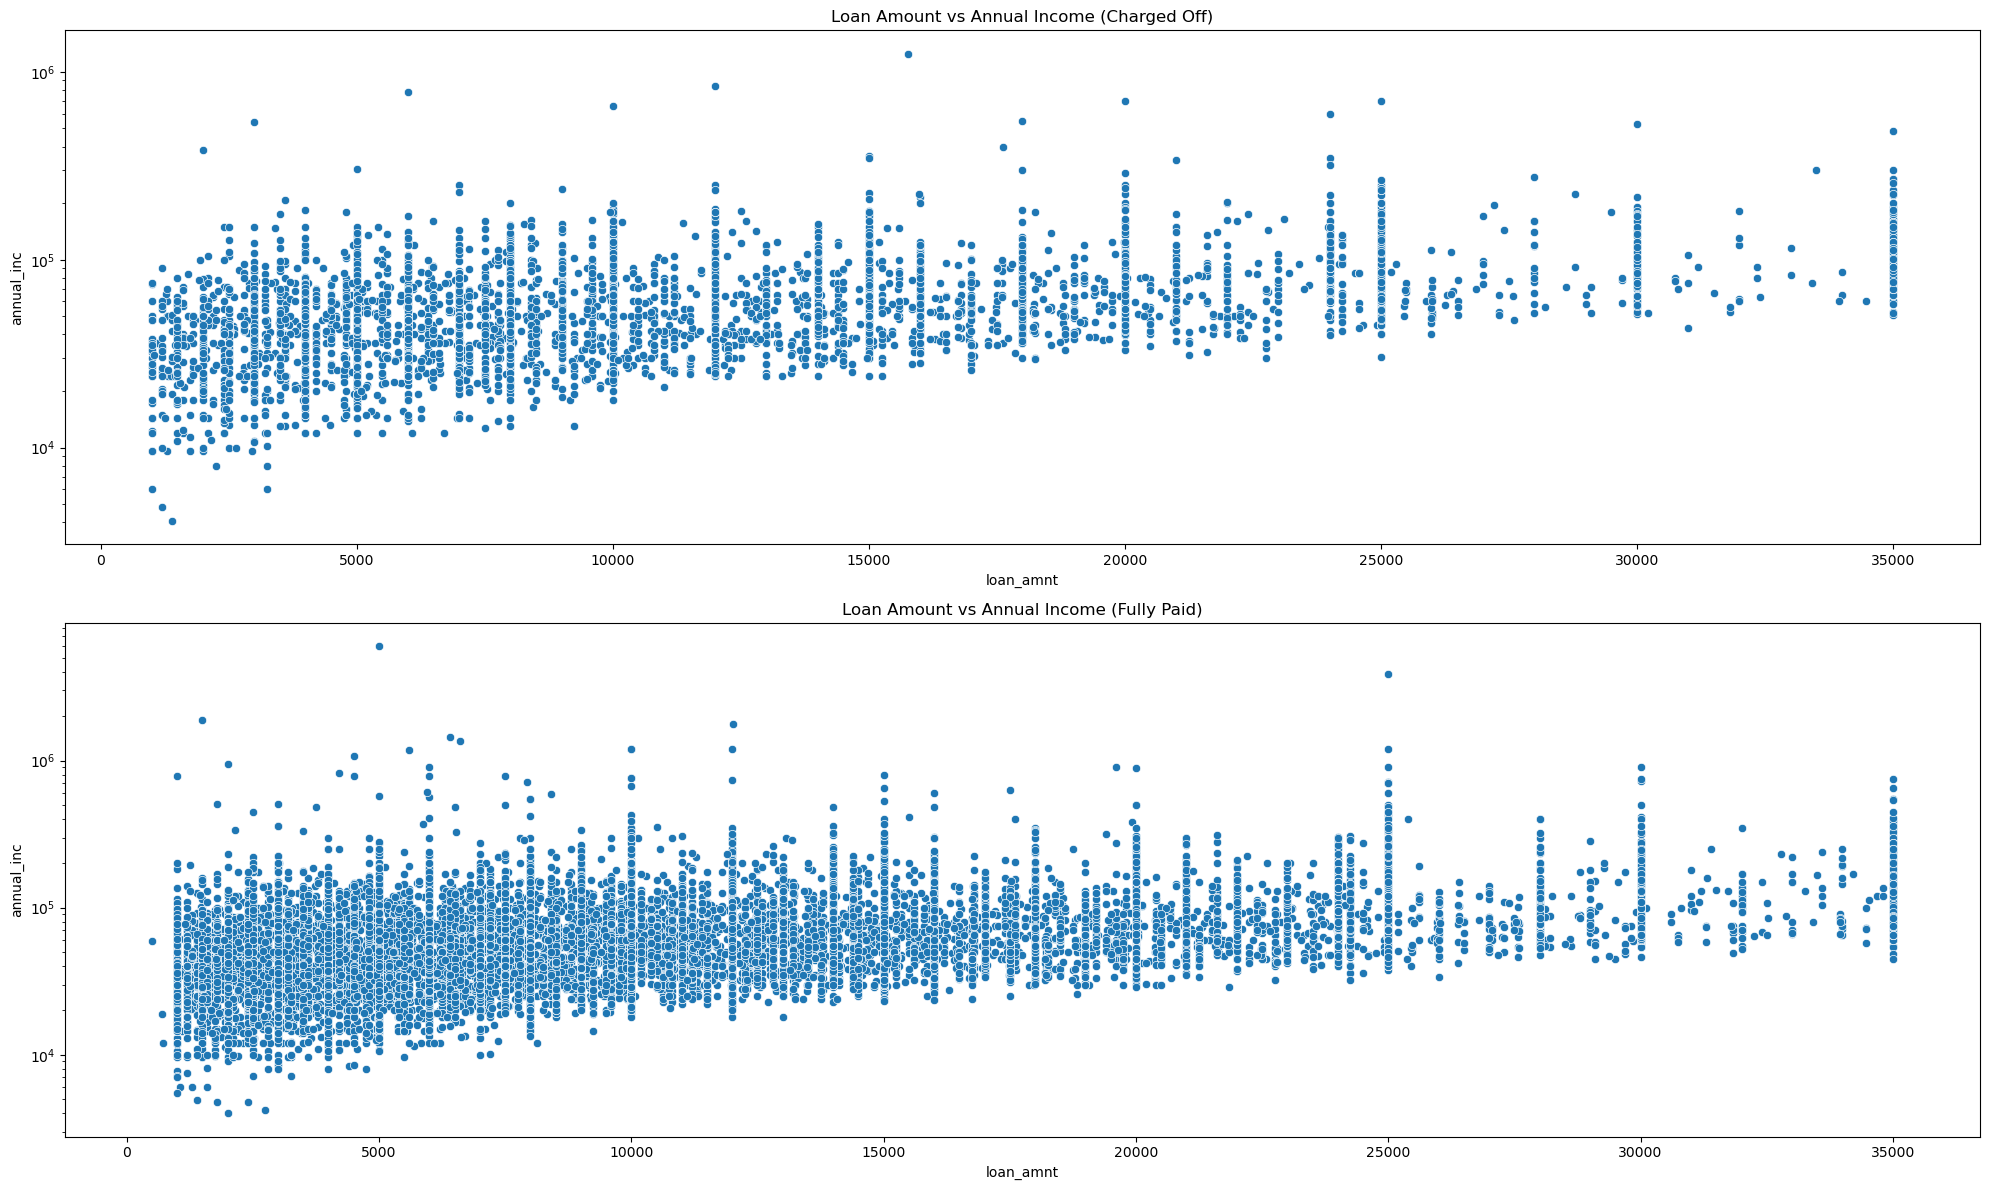

In [82]:
# Set up the figure and axes
plt.figure(figsize=(20, 12))

# Plot for 'Charged Off' loans
plt.subplot(2, 1, 1)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Annual Income (Charged Off)')

# Plot for 'Fully Paid' loans
plt.subplot(2, 1, 2)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Annual Income (Fully Paid)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


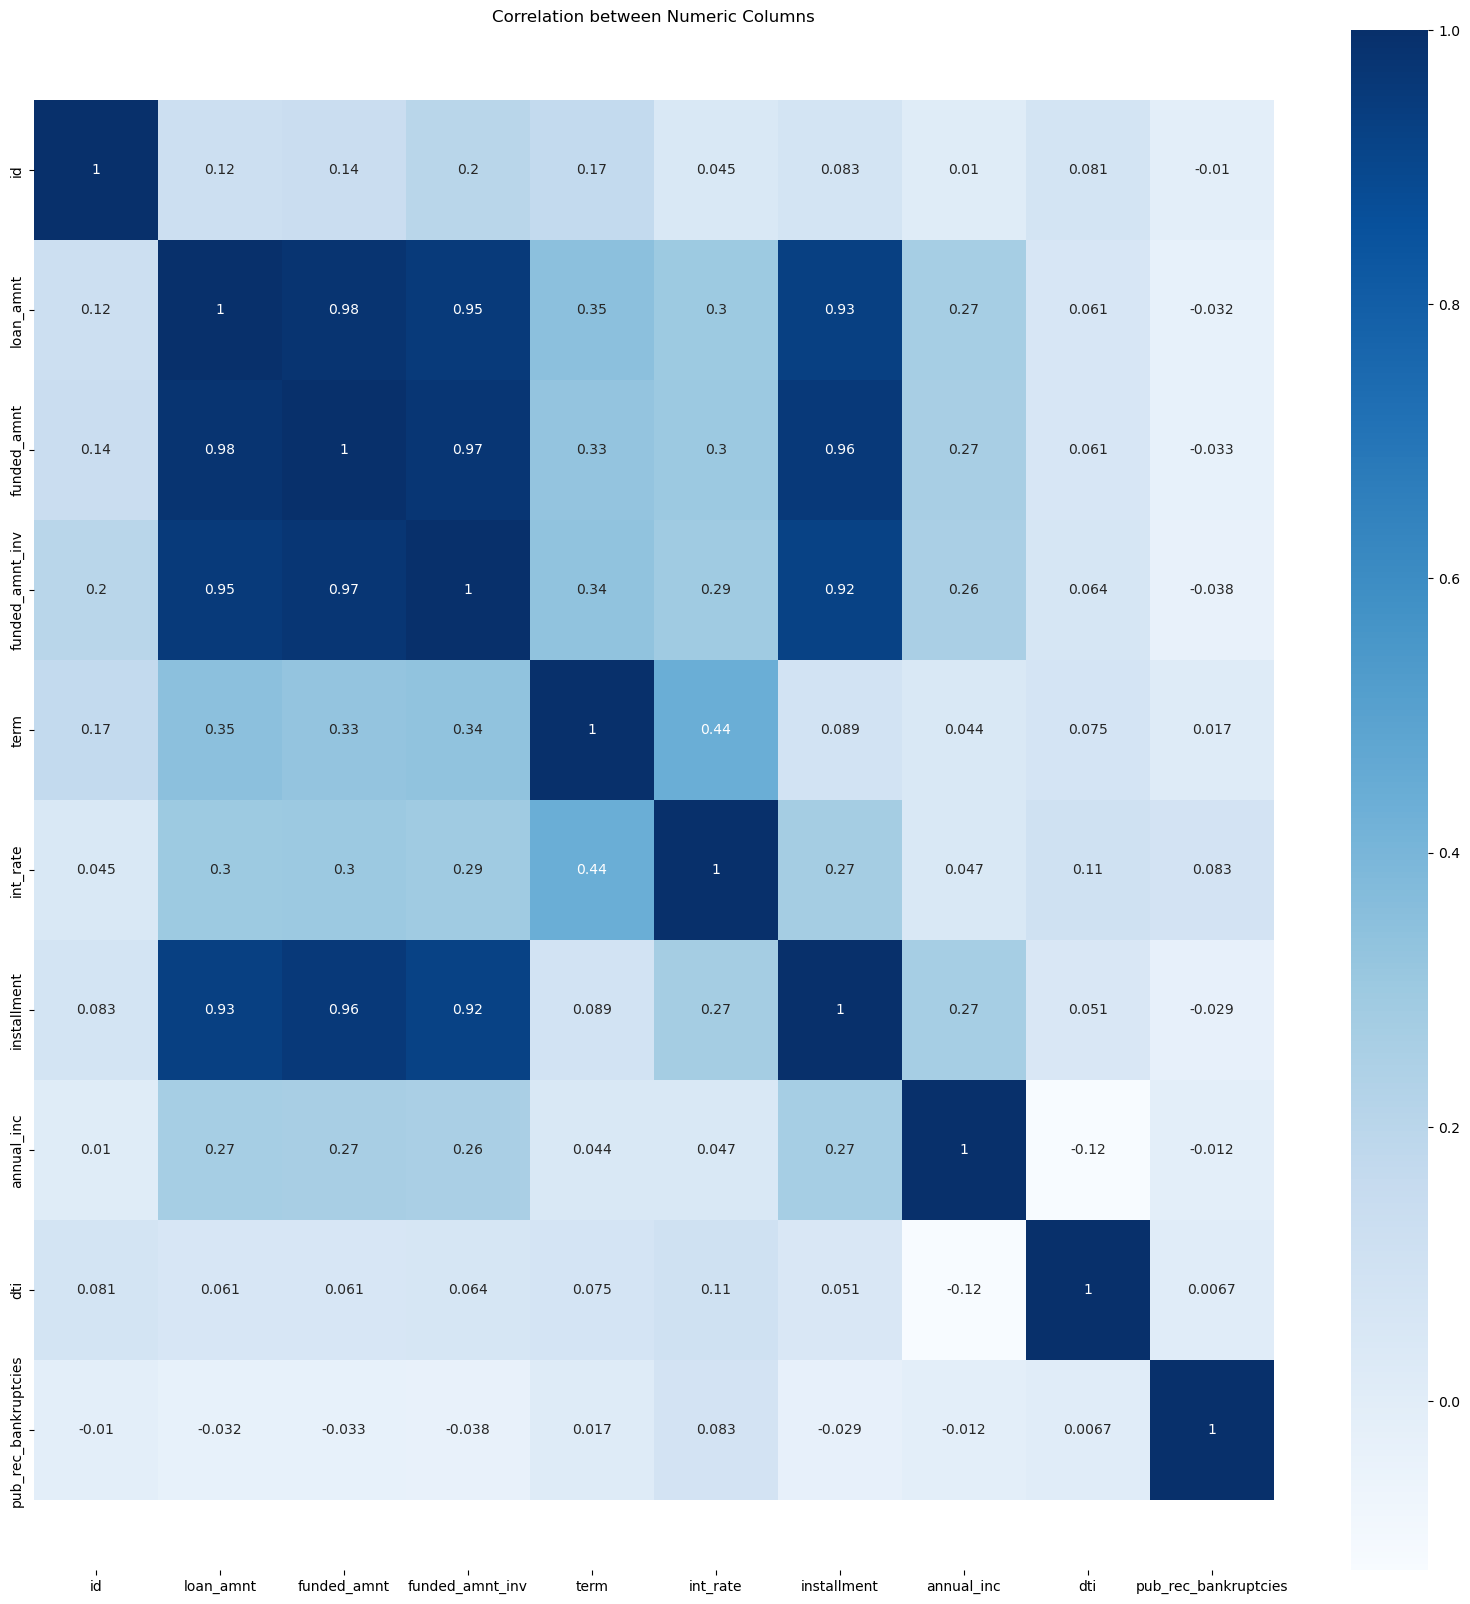

In [83]:
# Select only numeric columns for correlation calculation
numeric_data = loan_data.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Set up the figure and axes
plt.figure(figsize=(20, 20))

# Plot correlation matrix on a heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Adjust y-axis limits for better visualization
top, bottom = ax.get_ylim()
ax.set_ylim(top + 0.5, bottom - 0.5)

# Set title
plt.title("Correlation between Numeric Columns")

# Show the plot
plt.show()
